<a href="https://colab.research.google.com/github/nazalnihad/parallel_computing/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, RFE
import numpy as np
import requests
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
# Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

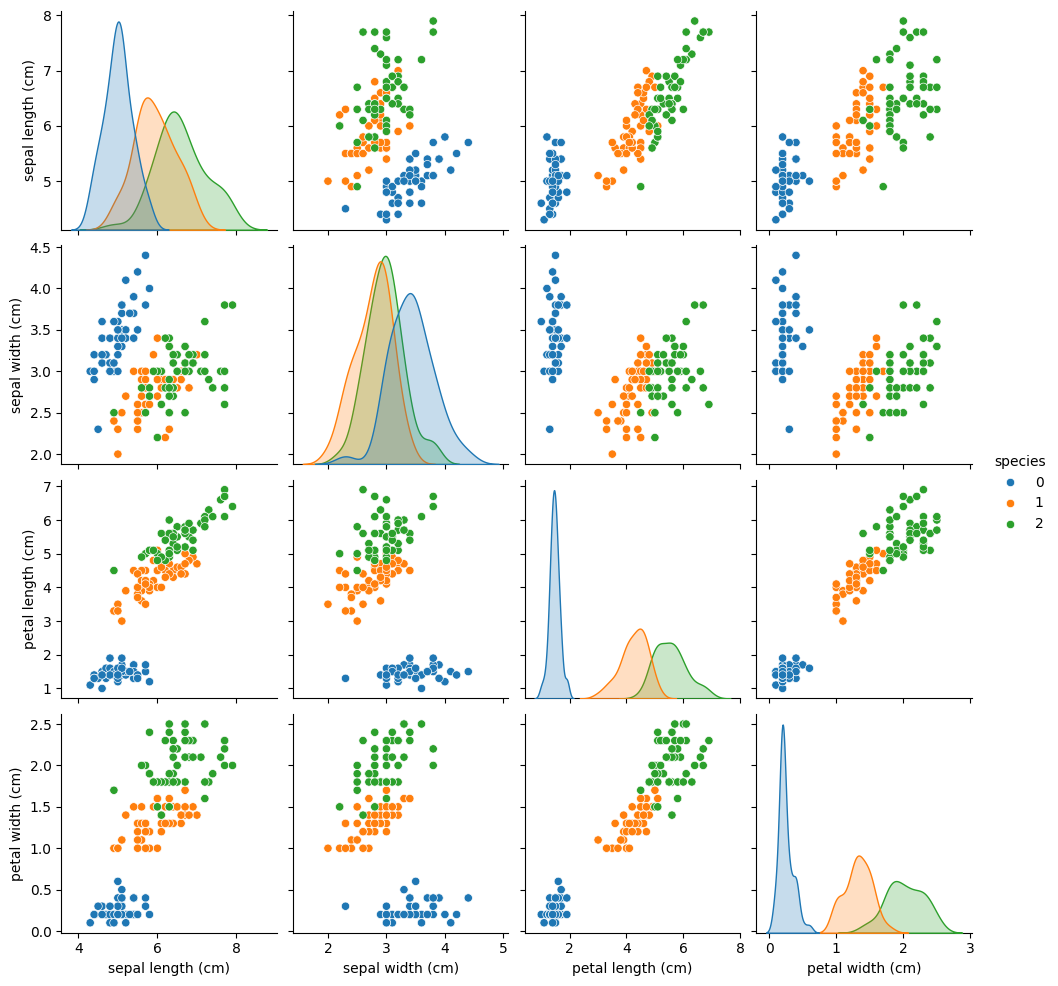

In [3]:
# Exploratory Data Analysis
iris_df = pd.DataFrame(X, columns=data.feature_names)
iris_df['species'] = y
sns.pairplot(iris_df, hue='species', palette='tab10')
plt.show()

In [4]:
# Univariate Feature Selection
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X_train, y_train)
selected_features = selector.get_support(indices=True)
print("Selected Features (Univariate):", np.array(data.feature_names)[selected_features])

Selected Features (Univariate): ['petal length (cm)' 'petal width (cm)']


In [5]:
# Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=data.feature_names)
print("Feature Importance:")
print(feature_importances.sort_values(ascending=False))

Feature Importance:
petal length (cm)    0.439994
petal width (cm)     0.421522
sepal length (cm)    0.108098
sepal width (cm)     0.030387
dtype: float64


In [6]:
# Recursive Feature Elimination (RFE) using SVM
svm = SVC(kernel='linear')
rfe = RFE(svm, n_features_to_select=2)
rfe.fit(X_train, y_train)
selected_rfe_features = np.array(data.feature_names)[rfe.support_]
print("Selected Features (RFE):", selected_rfe_features)

Selected Features (RFE): ['petal length (cm)' 'petal width (cm)']


Full Features Model Accuracy: 1.0000
Univariate Selection Model Accuracy: 1.0000
RFE Selection Model Accuracy: 1.0000


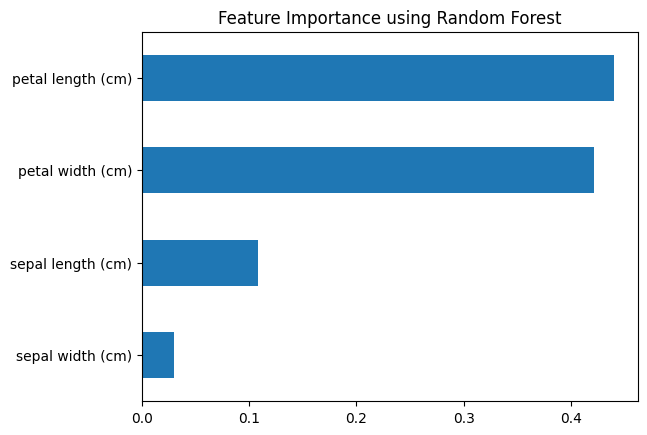

In [7]:
# Evaluate performance before and after feature selection
models = {'Full Features': X_train, 'Univariate Selection': X_new, 'RFE Selection': X_train[:, rfe.support_]}
for name, X_subset in models.items():
    X_train_sub, X_test_sub = X_subset, X_test[:, rfe.support_] if name != 'Full Features' else X_test
    model = SVC(kernel='linear')
    model.fit(X_train_sub, y_train)
    y_pred = model.predict(X_test_sub)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Model Accuracy: {accuracy:.4f}")


feature_importances.sort_values().plot(kind='barh', title='Feature Importance using Random Forest')
plt.show()